# SPAM FILTERATION PROJECT

In [ ]:
#In this spam filtering project,we have filter out the mails into 'spam'and 'Ham' mail.
# This is very useful to categorise the information to prevent from any kinds of fake or fraud messages which can harm us online

In [1]:
# importing all libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [2]:
# Data collection & preprocessing 
df=pd.read_csv("spams.csv")
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [3]:
#Drop unnecessary columns
df.drop(["Unnamed: 2","Unnamed: 3","Unnamed: 4"],axis=1,inplace=True)

In [4]:
#Renaming columns
df.rename(columns={"v1":"Category Type","v2":"Message"},inplace=True)

In [5]:
df.head()

,Category Type,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [6]:
df.tail()     # last 5 records will display

,Category Type,Message
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...
5571,ham,Rofl. Its true to its name


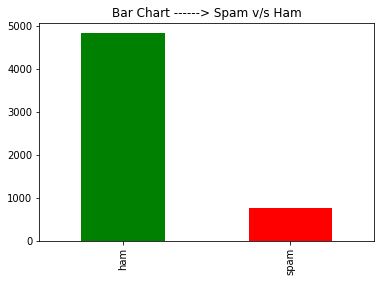

In [7]:
# Visualize Distribution of Messages using Bar Chart
count_class=pd.value_counts(df['Category Type'],sort=True)
count_class.plot(kind='bar',color=['Green','Red'])
plt.title('Bar Chart ------> Spam v/s Ham')
plt.show()

In [8]:
df.isnull().sum()

Category Type    0
Message          0
dtype: int64

In [9]:
df.shape

(5572, 2)

In [10]:
df.describe()   #describe numerical factors

,Category Type,Message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Category Type  5572 non-null   object
 1   Message        5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [12]:
# Import label encoder for feature scaling
from sklearn import preprocessing
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder()
# Encode labels in column 'Category'. 
df['Category Type']= label_encoder.fit_transform(df['Category Type']) 
df.head()
# here 1 denotes spam mail and O denotes Ham mail

,Category Type,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [13]:
# Now to divide the data into X and Y( dependent and independent variable)
X=df["Message"]
Y=df["Category Type"]

In [14]:
print(X)

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                Will Ì_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: Message, Length: 5572, dtype: object


In [15]:
print(Y)

0       0
1       0
2       1
3       0
4       0
       ..
5567    1
5568    0
5569    0
5570    0
5571    0
Name: Category Type, Length: 5572, dtype: int32


In [16]:
# SPLITTING OF DATA INTO TRAINING AND TESTING
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=2)

In [17]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(4457,)
(4457,)
(1115,)
(1115,)


In [18]:
# NOW TO APPLY FEATURE EXTRACTION
# transform the text data to feature vectors that can be used as input to the Logistic regression

feature_extraction = TfidfVectorizer(min_df = 1, stop_words='english', lowercase='True')

x_train_features = feature_extraction.fit_transform(x_train)
x_test_features = feature_extraction.transform(x_test)

# convert Y_train and Y_test values as integers

y_train = y_train.astype('int')
y_test = y_test.astype('int')

In [19]:
print(x_train)

3890    No problem. We will be spending a lot of quali...
5553                          Hahaha..use your brain dear
4366    I like dis sweater fr mango but no more my siz...
3968    Thanks for your message. I really appreciate y...
3771                Does uncle timi help in clearing cars
                              ...                        
3335                         Then u go back urself lor...
1099    Been up to ne thing interesting. Did you have ...
2514        Ok ill send you with in  &lt;DECIMAL&gt;  ok.
3606                         I have no idea where you are
2575                 Now thats going to ruin your thesis!
Name: Message, Length: 4457, dtype: object


In [20]:
print(x_train_features)

  (0, 6566)	0.29071829686789585
  (0, 5260)	0.5087678982336444
  (0, 4010)	0.4050685955975014
  (0, 6073)	0.5665799184805557
  (0, 5169)	0.4141795823412651
  (1, 2116)	0.3523355719340784
  (1, 1423)	0.5940444343697558
  (1, 6859)	0.4124100686677272
  (1, 3141)	0.5940444343697558
  (2, 3565)	0.40508027557608417
  (2, 5897)	0.440107047813195
  (2, 4140)	0.440107047813195
  (2, 2845)	0.3382880530026162
  (2, 6332)	0.440107047813195
  (2, 2258)	0.3104925886287087
  (2, 3910)	0.20972094634778068
  (3, 2105)	0.17893490557083572
  (3, 7191)	0.2812743655569581
  (3, 1763)	0.2431679156261037
  (3, 6620)	0.2114722422733664
  (3, 6461)	0.2757210982911898
  (3, 7045)	0.20776132213481782
  (3, 4865)	0.26062868324883703
  (3, 2251)	0.2952674814882996
  (3, 5175)	0.3101007821209402
  :	:
  (4451, 4355)	0.5653315538937795
  (4452, 6856)	0.8442476281269602
  (4452, 4003)	0.5359533024452802
  (4453, 7234)	0.3927126429320925
  (4453, 4634)	0.3513960490954625
  (4453, 4498)	0.36145784624804855
  (4453, 35

# LOGISTIC REGRESSION

In [21]:
#LOGISTIC REGRESSION
lr=LogisticRegression()
lr.fit(x_train_features,y_train)

LogisticRegression()

In [22]:
#checking accuracy of test data
pred_test=lr.predict(x_test_features)
print(pred_test)

accuracy_of_test_data=accuracy_score(pred_test,y_test)
accuracy_of_test_data

[0 0 0 ... 0 0 0]


0.9560538116591928

In [23]:
#checking accuracy of train data
pred_train=lr.predict(x_train_features)
print(pred_train)

accuracy_of_train_data=accuracy_score(pred_train,y_train)
accuracy_of_train_data

[0 0 0 ... 0 0 0]


0.971729863136639

# DECISION TREE

In [24]:
# let's apply decision tree
#fitting decision tree
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(criterion="entropy",random_state=0)
dt.fit(x_train_features,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [25]:

#checking accuracy of test data
dt_pred_test=dt.predict(x_test_features)
print(dt_pred_test)

accuracy_of_test_data1=accuracy_score(dt_pred_test,y_test)
accuracy_of_test_data1

#checking accuracy of train data
dt_pred_train=dt.predict(x_train_features)
print(dt_pred_train)

accuracy_of_train_data1=accuracy_score(dt_pred_train,y_train)
accuracy_of_train_data1



[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


1.0

# NAIVE BAYES

In [26]:
# Fitting Naive Bayes to the Training set  
from sklearn.naive_bayes import MultinomialNB
NB_classifier = MultinomialNB()  
NB_classifier.fit(x_train_features, y_train)

MultinomialNB()

In [27]:
#checking accuracy of test data
nb_pred_test=NB_classifier.predict(x_test_features)
print(nb_pred_test)

accuracy_of_test_data2=accuracy_score(nb_pred_test,y_test)
accuracy_of_test_data2

#checking accuracy of train data
nb_pred_train=NB_classifier.predict(x_train_features)
print(nb_pred_train)

accuracy_of_train_data2=accuracy_score(nb_pred_train,y_train)
accuracy_of_train_data2

[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


0.9829481714157505

# Random Forest

In [28]:
#Fitting Decision Tree classifier to the training set  
from sklearn.ensemble import RandomForestClassifier  
rf= RandomForestClassifier(n_estimators= 15, criterion="entropy")  
rf.fit(x_train_features, y_train)  

RandomForestClassifier(criterion='entropy', n_estimators=15)

In [29]:
#checking accuracy of test data
rf_pred_test=rf.predict(x_test_features)
print(rf_pred_test)

accuracy_of_test_data3=accuracy_score(rf_pred_test,y_test)
accuracy_of_test_data3

#checking accuracy of train data
rf_pred_train=rf.predict(x_train_features)
print(rf_pred_train)

accuracy_of_train_data3=accuracy_score(rf_pred_train,y_train)
accuracy_of_train_data3

[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


0.9986538030065066

In [30]:
#PREDICTION OF THE MODEL

In [38]:
#................................#let's check...............................................................
input=["WON FREE $40 cash price"]
input_feature=feature_extraction.transform(input)

prediction=dt.predict(input_feature)
prediction
if (prediction[0]==1):
    print("SPAM")
else:
    print("HAM")

SPAM


In [32]:
# out of the 4 algos, Decision tree works better with a very good accuracy followed by 
#random forest,naive bayes and Logistic regression